<a href="https://colab.research.google.com/github/AlekhyaKaka/Api-health-monitor/blob/main/Predictive_Modeling_API_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading csv file/dataset in a variable
# raw_csv_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/API Monitoring Hackathon/api_data.xlsx')
raw_csv_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/API Monitoring Hackathon/final_api_data.xlsx')

In [ ]:
#Checking contents of the dataset
raw_csv_data.head()

,user_id,timestamp,status_code,status_text,response_size,response_time,cpu_utilization,memory_utilization,status,protocol,location,api_method,url
0,kt429,2023-06-02T21:54:00,403,Forbidden,1143,133,21.22,28,fail,https,Asia,PUT,https://jsonplaceholder.typicode.com/posts/1
1,kt969,2023-04-27T05:25:43,200,OK,1649,112,6.79,25,pass,https,Asia,GET,https://jsonplaceholder.typicode.com/posts
2,kt133,2023-10-24T08:48:39,200,OK,1213,287,4.45,26,pass,https,Asia,PATCH,https://jsonplaceholder.typicode.com/posts/1
3,kt894,2023-02-21T01:13:21,500,Internal Server Error,1843,100,20.65,25,fail,https,Asia,PUT,https://jsonplaceholder.typicode.com/posts/1
4,kt820,2023-09-30T17:24:59,400,Bad Request,1365,228,30.67,37,fail,https,Asia,PUT,https://jsonplaceholder.typicode.com/posts/1


In [ ]:
raw_csv_data.shape

(211424, 13)

In [ ]:
#Making a copy of the dataset for manipulation
df=raw_csv_data.copy()

In [ ]:
df = df.replace(to_replace=r'^$|[^a-zA-Z0-9 ]', value="", regex=True)
df = df.apply(lambda x: x.str.strip()
                                if x.dtype == "object" else x)

In [ ]:
df.columns.values

array(['user_id', 'timestamp', 'status_code', 'status_text',
       'response_size', 'response_time', 'cpu_utilization',
       'memory_utilization', 'status', 'protocol', 'location',
       'api_method', 'url'], dtype=object)

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211424 entries, 0 to 211423
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             211424 non-null  object        
 1   timestamp           211424 non-null  datetime64[ns]
 2   status_code         211424 non-null  int64         
 3   status_text         211424 non-null  object        
 4   response_size       211424 non-null  int64         
 5   response_time       211424 non-null  int64         
 6   cpu_utilization     211424 non-null  float64       
 7   memory_utilization  211424 non-null  int64         
 8   status              211424 non-null  object        
 9   protocol            211424 non-null  object        
 10  location            211424 non-null  object        
 11  api_method          211424 non-null  object        
 12  url                 211424 non-null  object        
dtypes: datetime64[ns](1), float64

In [ ]:
#Getting dummies for 'API Method'
api_method_dummies=pd.get_dummies(df['api_method'], drop_first=False)
api_method_dummies

,DELETE,GET,PATCH,POST,PUT
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
211419,0,0,1,0,0
211420,0,0,1,0,0
211421,0,0,1,0,0
211422,0,0,1,0,0


In [ ]:
#Dropping 'API_method'
df=df.drop(['api_method'], axis=1)
df.head(2)

,user_id,timestamp,status_code,status_text,response_size,response_time,cpu_utilization,memory_utilization,status,protocol,location,url
0,kt429,2023-06-02 21:54:00,403,Forbidden,1143,133,21.22,28,fail,https,Asia,httpsjsonplaceholdertypicodecomposts1
1,kt969,2023-04-27 05:25:43,200,OK,1649,112,6.79,25,pass,https,Asia,httpsjsonplaceholdertypicodecomposts


In [ ]:
df_edit=pd.concat([df, api_method_dummies], axis=1)

In [ ]:
sorting=df_edit['timestamp'].unique()
sorting

array(['2023-06-02T21:54:00.000000000', '2023-04-27T05:25:43.000000000',
       '2023-10-24T08:48:39.000000000', ...,
       '2023-04-17T23:39:28.000000000', '2023-05-14T07:25:19.000000000',
       '2023-08-14T14:03:15.000000000'], dtype='datetime64[ns]')

In [ ]:
print(len(sorting))

195812


In [ ]:
sorting1=df_edit['status_code'].unique()
sorting1

array([403, 200, 500, 400, 401, 201, 404, 503, 204])

In [ ]:
sorting2=df_edit['response_size'].unique()
sorting2

array([1143, 1649, 1213, ..., 1736, 1424, 1820])

In [ ]:
sorting3=df_edit['response_time'].unique()
sorting3

array([133, 112, 287, 100, 228, 241, 236, 154, 272, 141, 184, 257, 268,
       123, 229, 215, 131, 291, 244, 240, 109, 262, 274, 140, 273, 107,
       265, 238, 106, 209, 299, 269, 196, 290, 129, 110, 300, 260, 242,
       255, 153, 249, 213, 118, 168, 286, 191, 263, 149, 115, 251, 144,
       113, 125, 235, 182, 124, 145, 152, 122, 278, 160, 165, 179, 222,
       205, 247, 134, 161, 158, 293, 207, 279, 171, 137, 132, 185, 246,
       211, 233, 252, 108, 261, 210, 126, 199, 190, 120, 276, 216, 187,
       143, 173, 203, 157, 289, 128, 243, 186, 281, 253, 271, 245, 267,
       127, 189, 181, 159, 105, 155, 294, 167, 298, 170, 139, 177, 285,
       166, 121, 164, 148, 193, 221, 147, 280, 103, 202, 101, 282, 264,
       234, 266, 114, 146, 176, 232, 150, 195, 284, 136, 231, 214, 206,
       116, 175, 117, 230, 288, 208, 135, 254, 151, 180, 192, 138, 204,
       104, 224, 174, 217, 275, 198, 183, 239, 169, 119, 237, 227, 178,
       270, 292, 197, 102, 130, 142, 201, 218, 250, 296, 172, 25

In [ ]:
sorting4=df_edit['status_text'].unique()
sorting4

array(['Forbidden', 'OK', 'Internal Server Error', 'Bad Request',
       'Unauthorized', 'Created', 'Not Found', 'Service Unavailable',
       'No Content'], dtype=object)

In [ ]:
#Getting dummies for 'status_text'
status_text_dummies=pd.get_dummies(df['status_text'], drop_first=False)
status_text_dummies.head(2)

,Bad Request,Created,Forbidden,Internal Server Error,No Content,Not Found,OK,Service Unavailable,Unauthorized
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0


In [ ]:
df_edit=pd.concat([df_edit, status_text_dummies], axis=1)
#Dropping 'status_text'
df_edit=df_edit.drop(['status_text'], axis=1)

In [ ]:
df_edit.head(5)

,user_id,timestamp,status_code,response_size,response_time,cpu_utilization,memory_utilization,status,protocol,location,...,PUT,Bad Request,Created,Forbidden,Internal Server Error,No Content,Not Found,OK,Service Unavailable,Unauthorized
0,kt429,2023-06-02 21:54:00,403,1143,133,21.22,28,fail,https,Asia,...,1,0,0,1,0,0,0,0,0,0
1,kt969,2023-04-27 05:25:43,200,1649,112,6.79,25,pass,https,Asia,...,0,0,0,0,0,0,0,1,0,0
2,kt133,2023-10-24 08:48:39,200,1213,287,4.45,26,pass,https,Asia,...,0,0,0,0,0,0,0,1,0,0
3,kt894,2023-02-21 01:13:21,500,1843,100,20.65,25,fail,https,Asia,...,1,0,0,0,1,0,0,0,0,0
4,kt820,2023-09-30 17:24:59,400,1365,228,30.67,37,fail,https,Asia,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
sorting5=df_edit['PATCH'].unique()
sorting5

array([0, 1], dtype=uint8)

In [ ]:
sorting6=df_edit['memory_utilization'].unique()
sorting6

array([28, 25, 26, 37, 30, 24, 21, 31, 40, 20, 33, 35, 29, 38, 39, 36, 22,
       23, 32, 27, 34])

In [ ]:
sorting7=df_edit['user_id'].unique()
sorting7

array(['kt429', 'kt969', 'kt133', 'kt894', 'kt820', 'kt389', 'kt364',
       'kt868', 'kt058', 'kt319', 'kt374', 'kt473', 'kt732', 'kt071',
       'kt583', 'kt853', 'kt615', 'kt802', 'kt903', 'kt504', 'kt862',
       'kt000', 'kt037', 'kt520', 'kt201', 'kt956', 'kt653', 'kt304',
       'kt530', 'kt329', 'kt641', 'kt142', 'kt137', 'kt994', 'kt117',
       'kt541', 'kt926', 'kt259', 'kt070', 'kt209', 'kt606', 'kt373',
       'kt059', 'kt991', 'kt350', 'kt150', 'kt314', 'kt677', 'kt746',
       'kt525', 'kt672', 'kt008', 'kt299', 'kt417', 'kt067', 'kt475',
       'kt897', 'kt900', 'kt149', 'kt988', 'kt198', 'kt307', 'kt236',
       'kt998', 'kt568', 'kt664', 'kt719', 'kt268', 'kt628', 'kt576',
       'kt928', 'kt942', 'kt084', 'kt371', 'kt710', 'kt202', 'kt848',
       'kt316', 'kt433', 'kt069', 'kt778', 'kt629', 'kt170', 'kt189',
       'kt644', 'kt056', 'kt974', 'kt810', 'kt543', 'kt323', 'kt033',
       'kt741', 'kt876', 'kt153', 'kt174', 'kt156', 'kt836', 'kt922',
       'kt881', 'kt3

In [ ]:
#Dropping 'ID' as it is of no use to our prediction
df=df.drop(['user_id'], axis=1)

In [ ]:
sorting8=df_edit['cpu_utilization'].unique()
sorting8

array([21.22,  6.79,  4.45, ...,  2.  , 11.85, 11.91])

In [ ]:
sorting9=df_edit['status'].unique()
sorting9

array(['fail', 'pass'], dtype=object)

In [ ]:
#Renaming the 'status'
df_edit['status'] = df['status'].replace(['pass', 'fail'], ['1', '0'])

In [ ]:
df_edit.head(5)

,user_id,timestamp,status_code,response_size,response_time,cpu_utilization,memory_utilization,status,protocol,location,...,PUT,Bad Request,Created,Forbidden,Internal Server Error,No Content,Not Found,OK,Service Unavailable,Unauthorized
0,kt429,2023-06-02 21:54:00,403,1143,133,21.22,28,0,https,Asia,...,1,0,0,1,0,0,0,0,0,0
1,kt969,2023-04-27 05:25:43,200,1649,112,6.79,25,1,https,Asia,...,0,0,0,0,0,0,0,1,0,0
2,kt133,2023-10-24 08:48:39,200,1213,287,4.45,26,1,https,Asia,...,0,0,0,0,0,0,0,1,0,0
3,kt894,2023-02-21 01:13:21,500,1843,100,20.65,25,0,https,Asia,...,1,0,0,0,1,0,0,0,0,0
4,kt820,2023-09-30 17:24:59,400,1365,228,30.67,37,0,https,Asia,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
sorting10=df_edit['protocol'].unique()
sorting10

array(['https', 'http'], dtype=object)

In [ ]:
# Creating dummy variables out of 'Protocol'

protocol_dummies=pd.get_dummies(df['protocol'], drop_first=False)
protocol_dummies

,http,https
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
211419,0,1
211420,0,1
211421,0,1
211422,0,1


In [ ]:
df_edit=pd.concat([df_edit, protocol_dummies], axis=1)
#Dropping 'protocol'
df=df.drop(['protocol'], axis=1)

In [ ]:
df.head(5)

,timestamp,status_code,status_text,response_size,response_time,cpu_utilization,memory_utilization,status,location,url
0,2023-06-02 21:54:00,403,Forbidden,1143,133,21.22,28,fail,Asia,httpsjsonplaceholdertypicodecomposts1
1,2023-04-27 05:25:43,200,OK,1649,112,6.79,25,pass,Asia,httpsjsonplaceholdertypicodecomposts
2,2023-10-24 08:48:39,200,OK,1213,287,4.45,26,pass,Asia,httpsjsonplaceholdertypicodecomposts1
3,2023-02-21 01:13:21,500,Internal Server Error,1843,100,20.65,25,fail,Asia,httpsjsonplaceholdertypicodecomposts1
4,2023-09-30 17:24:59,400,Bad Request,1365,228,30.67,37,fail,Asia,httpsjsonplaceholdertypicodecomposts1


In [ ]:
sorting12=df_edit['location'].unique()
sorting12

array(['Asia', 'Africa', 'North America', 'South America', 'Europe',
       'Australia', 'Antarctica'], dtype=object)

In [ ]:
#Getting dummies for 'location'
location_dummies=pd.get_dummies(df['location'], drop_first=False)
location_dummies

,Africa,Antarctica,Asia,Australia,Europe,North America,South America
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
211419,0,0,0,0,0,1,0
211420,0,0,0,0,0,1,0
211421,0,0,0,0,0,1,0
211422,0,0,0,0,0,1,0


In [ ]:
df_edit=pd.concat([df_edit, location_dummies], axis=1)
#Dropping 'continent'
df_edit=df_edit.drop(['location'], axis=1)

In [ ]:
#Renaming the 'status'
df_edit['url'] = df['url'].replace(['httpsjsonplaceholdertypicodecomposts1', 'httpsjsonplaceholdertypicodecomposts',
        'httpxkcdcominfo0json', 'httpsdogceoapibreedsimagerandom',
       'httpsapiapisguruv2listjson', 'httpsa4cdnorgboardsjson',
       'httpsapisisflightlanguageentypedeparturess', 'httpssoftwiumcomapibooks',
       'httpsapisisflightlanguageentypedepartures'],
      ['https://jsonplaceholder.typicode.com/posts/1', 'https://jsonplaceholder.typicode.com/posts',
       'http://xkcd.com/info.0.json', 'https://dog.ceo/api/breeds/image/random',
       'https://api.apis.guru/v2/list.json', 'https://a.4cdn.org/boards.json',
       'https://apis.is/flight?language=en&type=departuress', 'https://softwium.com/api/books',
       'https://apis.is/flight?language=en&type=departures'])

In [ ]:
sorting14=df_edit['url'].unique()
sorting14

array(['https://jsonplaceholder.typicode.com/posts/1',
       'https://jsonplaceholder.typicode.com/posts',
       'http://xkcd.com/info.0.json',
       'https://dog.ceo/api/breeds/image/random',
       'https://api.apis.guru/v2/list.json',
       'https://a.4cdn.org/boards.json',
       'https://apis.is/flight?language=en&type=departuress',
       'https://softwium.com/api/books',
       'https://apis.is/flight?language=en&type=departures'], dtype=object)

In [ ]:
# Creating dummies out of 'url'
url_dummies=pd.get_dummies(df_edit['url'], drop_first=False)
url_dummies.head(2)

,http://xkcd.com/info.0.json,https://a.4cdn.org/boards.json,https://api.apis.guru/v2/list.json,https://apis.is/flight?language=en&type=departures,https://apis.is/flight?language=en&type=departuress,https://dog.ceo/api/breeds/image/random,https://jsonplaceholder.typicode.com/posts,https://jsonplaceholder.typicode.com/posts/1,https://softwium.com/api/books
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0


In [ ]:
df_edit=pd.concat([df_edit, url_dummies], axis=1)
#Dropping 'url'
df_edit=df_edit.drop(['url'], axis=1)

In [ ]:
df_edit.columns.values

array(['user_id', 'timestamp', 'status_code', 'response_size',
       'response_time', 'cpu_utilization', 'memory_utilization', 'status',
       'protocol', 'DELETE', 'GET', 'PATCH', 'POST', 'PUT', 'Bad Request',
       'Created', 'Forbidden', 'Internal Server Error', 'No Content',
       'Not Found', 'OK', 'Service Unavailable', 'Unauthorized', 'http',
       'https', 'Africa', 'Antarctica', 'Asia', 'Australia', 'Europe',
       'North America', 'South America', 'http://xkcd.com/info.0.json',
       'https://a.4cdn.org/boards.json',
       'https://api.apis.guru/v2/list.json',
       'https://apis.is/flight?language=en&type=departures',
       'https://apis.is/flight?language=en&type=departuress',
       'https://dog.ceo/api/breeds/image/random',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'https://softwium.com/api/books'], dtype=object)

In [ ]:
#Reordering columns
columns_reordered= ['user_id', 'http://xkcd.com/info.0.json',
       'https://a.4cdn.org/boards.json',
       'https://api.apis.guru/v2/list.json',
       'https://apis.is/flight?language=en&type=departures',
       'https://apis.is/flight?language=en&type=departuress',
       'https://dog.ceo/api/breeds/image/random',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'https://softwium.com/api/books','timestamp', 'response_time', 'response_size', 'memory_utilization', 'cpu_utilization',
                   'status_code', 'Bad Request', 'Created', 'Forbidden', 'Internal Server Error', 'No Content',
       'Not Found', 'OK', 'Service Unavailable', 'Unauthorized','https', 'http', 'DELETE', 'GET', 'PATCH', 'POST', 'PUT',
                    'Africa',
       'Antarctica', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'status']

In [ ]:
df_edit=df_edit[columns_reordered]
df_edit.head(1)

,user_id,http://xkcd.com/info.0.json,https://a.4cdn.org/boards.json,https://api.apis.guru/v2/list.json,https://apis.is/flight?language=en&type=departures,https://apis.is/flight?language=en&type=departuress,https://dog.ceo/api/breeds/image/random,https://jsonplaceholder.typicode.com/posts,https://jsonplaceholder.typicode.com/posts/1,https://softwium.com/api/books,...,POST,PUT,Africa,Antarctica,Asia,Australia,Europe,North America,South America,status
0,kt429,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
#Dropping 'ID' as it is of no use to our prediction
df_edit=df_edit.drop(['user_id'], axis=1)

In [ ]:
df_edit.columns.values

array(['http://xkcd.com/info.0.json', 'https://a.4cdn.org/boards.json',
       'https://api.apis.guru/v2/list.json',
       'https://apis.is/flight?language=en&type=departures',
       'https://apis.is/flight?language=en&type=departuress',
       'https://dog.ceo/api/breeds/image/random',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'https://softwium.com/api/books', 'timestamp', 'response_time',
       'response_size', 'memory_utilization', 'cpu_utilization',
       'status_code', 'Bad Request', 'Created', 'Forbidden',
       'Internal Server Error', 'No Content', 'Not Found', 'OK',
       'Service Unavailable', 'Unauthorized', 'https', 'http', 'DELETE',
       'GET', 'PATCH', 'POST', 'PUT', 'Africa', 'Antarctica', 'Asia',
       'Australia', 'Europe', 'North America', 'South America', 'status'],
      dtype=object)

<ipython-input-47-71f2262ff0bf>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_edit.corr(), dtype=np.bool))
<ipython-input-47-71f2262ff0bf>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_edit.corr(), dtype=np.bool))
<ipython-input-47-71f2262ff0bf>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeri

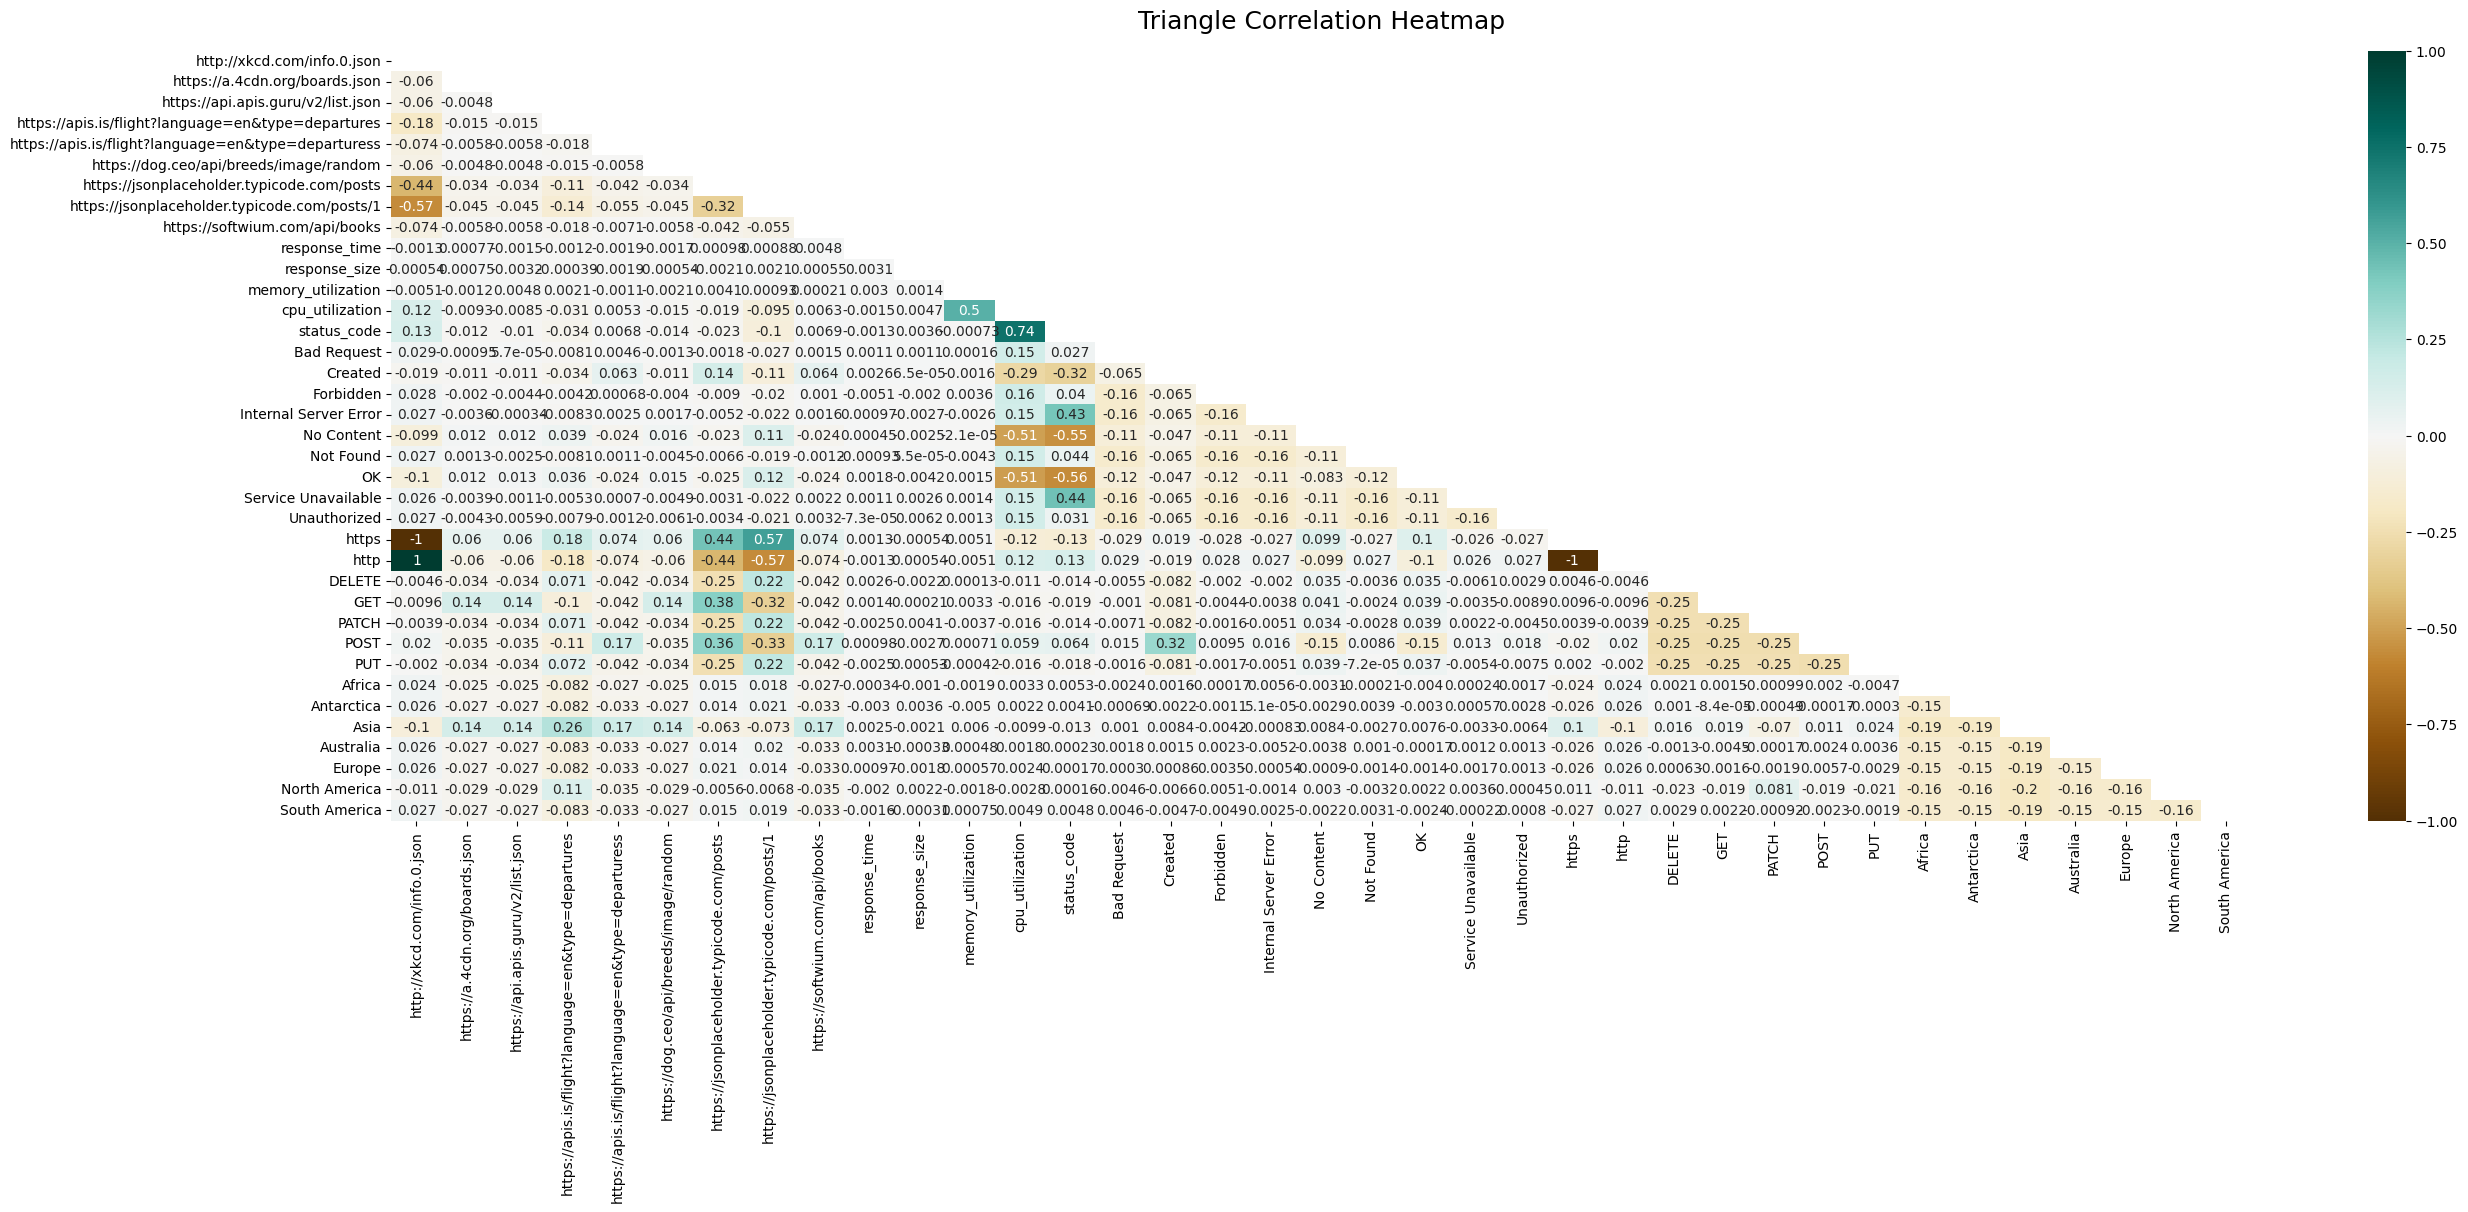

In [ ]:
# Checking variables for multicollinearity

#Understanding the correlation between features
plt.figure(figsize=(30, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_edit.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_edit.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df_edit.columns.values

array(['http://xkcd.com/info.0.json', 'https://a.4cdn.org/boards.json',
       'https://api.apis.guru/v2/list.json',
       'https://apis.is/flight?language=en&type=departures',
       'https://apis.is/flight?language=en&type=departuress',
       'https://dog.ceo/api/breeds/image/random',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'https://softwium.com/api/books', 'timestamp', 'response_time',
       'response_size', 'memory_utilization', 'cpu_utilization',
       'status_code', 'Bad Request', 'Created', 'Forbidden',
       'Internal Server Error', 'No Content', 'Not Found', 'OK',
       'Service Unavailable', 'Unauthorized', 'https', 'http', 'DELETE',
       'GET', 'PATCH', 'POST', 'PUT', 'Africa', 'Antarctica', 'Asia',
       'Australia', 'Europe', 'North America', 'South America', 'status'],
      dtype=object)

**Data standardization**

In [ ]:
# Selects all rows and all columns until targets
unscaled_inputs=df_edit[['http://xkcd.com/info.0.json',
       'https://a.4cdn.org/boards.json',
       'https://api.apis.guru/v2/list.json',
       'https://apis.is/flight?language=en&type=departures',
       'https://apis.is/flight?language=en&type=departuress',
       'https://dog.ceo/api/breeds/image/random',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'https://softwium.com/api/books',
       'response_size', 'memory_utilization', 'cpu_utilization',
       'status_code', 'Bad Request', 'Created', 'Forbidden',
       'Internal Server Error', 'No Content', 'Not Found', 'OK',
       'Service Unavailable', 'Unauthorized', 'https', 'http', 'DELETE',
       'GET', 'PATCH', 'POST', 'PUT', 'Africa', 'Antarctica', 'Asia',
       'Australia', 'Europe', 'North America', 'South America', 'status']]
targets=df_edit['response_time']     #Adding targets to the dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler
api_scaler = StandardScaler() #StandardScaler follows Standard Normal Distribution. Hence, it makes mean = 0 & scales the

In [ ]:
api_scaler.fit(unscaled_inputs) #fit() trains & learns the relationship between features
scaled_inputs=api_scaler.transform(unscaled_inputs) #transforms all the features using the respective mean and variance

In [ ]:
# declaring 4 variables for the split, random state gives the same output each time the cell is run

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8,
                                                                            test_size = 0.2,random_state = 20)

In [ ]:
train_test_split(scaled_inputs, targets)              #Array 1,2=train dataset with inputs & targets, Array 3,4=test dataset with inputs & targets

[array([[-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        [-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        [ 1.14567257, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        ...,
        [ 1.14567257, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        [-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647,  2.13901388],
        [-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515]]),
 array([[ 1.14567257, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        [-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        [-0.87284974, -0.068937  , -0.068937  , ..., -0.41460275,
         -0.39148647, -0.46750515],
        ...,
        [-0.87284974, -0.068937  , -0.068937  , ..., -

**Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Training the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting on the testing set
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3367.075819482591


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
x = df_edit[['http://xkcd.com/info.0.json',
       'https://jsonplaceholder.typicode.com/posts',
       'https://jsonplaceholder.typicode.com/posts/1',
       'response_time', 'response_size', 'memory_utilization',
       'cpu_utilization', 'status_code', 'Bad Request', 'Created',
       'Forbidden', 'Internal Server Error', 'No Content', 'Not Found',
       'OK', 'Service Unavailable', 'Unauthorized', 'https', 'http',
       'DELETE', 'GET', 'PATCH', 'POST', 'PUT', 'Africa', 'Antarctica',
       'Asia', 'Australia', 'Europe', 'North America', 'South America',
       'status']]
y = df_edit['response_time']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting on the testing set
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Stratified Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv)
print("Stratified Cross Validation Mean Squared Error:", -scores.mean())


Mean Squared Error: 3.5240125694932005e-27
Stratified Cross Validation Mean Squared Error: 4.327245927431613e-27


In [ ]:
# Creating a DataFrame to display actual and predicted values side by side
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

        Actual  Predicted
175041     295      295.0
187078     300      300.0
48480      101      101.0
2393       297      297.0
63638      161      161.0
...        ...        ...
110200     225      225.0
1597       161      161.0
21260      294      294.0
29188      189      189.0
80336      174      174.0

[42285 rows x 2 columns]


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable
# X should be a 2D array and y should be a 1D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the SVR model
svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression

# Train the SVR model
svr.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.4961093009213315


In [ ]:
# Creating a DataFrame to display actual and predicted values side by side
results = pd.DataFrame({'Actual Response Time': y_test, 'Predicted Response Time': y_pred})
print(results.head(10))

        Actual Response Time  Predicted Response Time
175041                   295               294.271912
187078                   300               297.628469
48480                    101               102.019087
2393                     297               295.296657
63638                    161               159.863243
94131                    125               124.173213
189379                   186               185.150072
73289                    150               148.440183
2956                     164               163.541385
81034                    241               242.272379


In [ ]:
# Shuffle the DataFrame
shuffled_df = df_edit.sample(frac=1, random_state=42)  # frac=1 shuffles all rows, random_state for reproducibility

In [ ]:
df_preprocessed=shuffled_df.copy()
df_preprocessed.head(2)

,http://xkcd.com/info.0.json,https://a.4cdn.org/boards.json,https://api.apis.guru/v2/list.json,https://apis.is/flight?language=en&type=departures,https://apis.is/flight?language=en&type=departuress,https://dog.ceo/api/breeds/image/random,https://jsonplaceholder.typicode.com/posts,https://jsonplaceholder.typicode.com/posts/1,https://softwium.com/api/books,timestamp,...,POST,PUT,Africa,Antarctica,Asia,Australia,Europe,North America,South America,status
175041,1,0,0,0,0,0,0,0,0,2023-05-08 08:54:18,...,0,0,0,1,0,0,0,0,0,0
187078,1,0,0,0,0,0,0,0,0,2023-07-28 01:41:42,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Save the DataFrame to an Excel file
df_preprocessed.to_excel('api_pp_data.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('api_pp_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Pickling is done to convert an object (here, "reg") into byte stream for easily transportation across various online sources
import pickle

#Pickling Logistic regression object
with open('svm_pk', 'wb') as file:      #model=our ML model, wb=write bytes
    pickle.dump(svr, file)             #dump=save, reg=object


# pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(scaler, file)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/API Monitoring Hackathon/svm_pk', 'wb') as file:
    pickle.dump(svr, file)

with open('/content/drive/My Drive/Colab Notebooks/API Monitoring Hackathon/scaler', 'wb') as file:
    pickle.dump(scaler, file)
